## EXAMEN

ALUMNNO ANTONIO MILTOS

información del conjunto de datos 

Los dos conjuntos de datos están relacionados con las variantes roja y blanca del vino portugués "Vinho Verde". Para más detalles, consulte: http://www.vinhoverde.pt/en/ o la referencia [Cortez et al., 2009]. Debido a cuestiones de privacidad y logística, solo están disponibles las variables fisicoquímicas (entradas) y sensoriales (salida) (por ejemplo, no hay datos sobre tipos de uva, marca de vino, precio de venta del vino, etc.). Estos conjuntos de datos pueden considerarse como tareas de clasificación o regresión. Las clases están ordenadas y no equilibradas (por ejemplo, hay muchos más vinos normales que excelentes o malos). Se podrían utilizar algoritmos de detección de valores atípicos para detectar los pocos vinos excelentes o malos. Además, no estamos seguros de si todas las variables de entrada son relevantes. Por lo tanto, podría ser interesante probar métodos de selección de características.

¿Tiene valores faltantes?

No

Diccionario de Datos:
```python

fixed acidity: Acidez fija en g/dm³.
volatile acidity: Acidez volátil en g/dm³.
citric acid: Ácido cítrico en g/dm³.
residual sugar: Azúcar residual en g/dm³.
chlorides: Cloruros en g/dm³.
free sulfur dioxide: Dióxido de azufre libre en mg/dm³.
total sulfur dioxide: Dióxido de azufre total en mg/dm³.
density: Densidad en g/cm³.
pH: Nivel de pH.
sulphates: Sulfatos en g/dm³.
alcohol: Porcentaje de alcohol en % vol.
quality: Calidad del vino (variable objetivo, escala de 0 a 10).
```

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score

In [2]:
# Cargar de datos
df_red = pd.read_csv('c:\\Users\\anton\\OneDrive\\Desktop\\Documentos\\EXAMEN MACHINE LEARNING 3\\DATOS\\winequality-red.csv', sep=';')
df_white = pd.read_csv('c:\\Users\\anton\\OneDrive\\Desktop\\Documentos\\EXAMEN MACHINE LEARNING 3\\DATOS\\winequality-white.csv', sep=';')

In [3]:
df_red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
df_white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [5]:
df_red.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
df_white.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [7]:
df_red.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [8]:
df_white.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


# 1. Limpieza de Datos

In [9]:
# a. Identificación y eliminación de valores duplicados
df_red.drop_duplicates(inplace=True)
df_white.drop_duplicates(inplace=True)

In [10]:
# b. Verificación y ajuste de tipos de datos
df_red['quality'] = df_red['quality'].astype(int)
df_white['quality'] = df_white['quality'].astype(int)

In [11]:
# d. Manejo de valores faltantes
df_red.fillna(df_red.median(numeric_only=True), inplace=True)
df_white.fillna(df_white.median(numeric_only=True), inplace=True)


In [12]:
# Función para recortar valores extremos al percentil 99
def cap_outliers(df, columns, upper_percentile=0.99):
    caps = df.quantile(upper_percentile)
    for col in columns:
        df[col] = df[col].clip(upper=caps[col])
    return df

In [13]:
# Recortar valores extremos para columnas numéricas
numeric_columns = [
    "fixed acidity", "volatile acidity", "citric acid", "residual sugar",
    "chlorides", "free sulfur dioxide", "total sulfur dioxide",
    "density", "pH", "sulphates", "alcohol"
]

In [14]:
# Recortar valores atípicos
red_wine = cap_outliers(df_red.copy(), numeric_columns)  
white_wine = cap_outliers(df_white.copy(), numeric_columns) 

# 2. Exploración de Datos

Text(0, 0.5, 'Frecuencia')

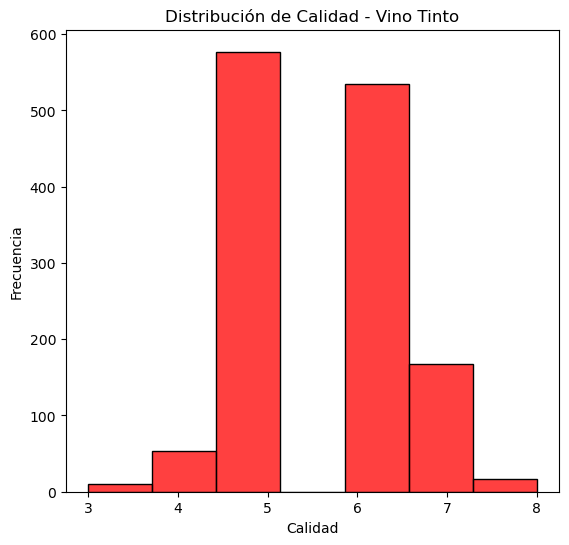

In [15]:
# 3. Exploración de datos
# Distribución de calidad
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.histplot(red_wine["quality"], bins=7, kde=False, color='red')
plt.title("Distribución de Calidad - Vino Tinto")
plt.xlabel("Calidad")
plt.ylabel("Frecuencia")

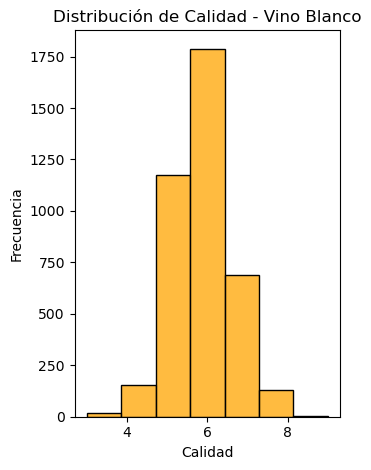

In [16]:
plt.subplot(1, 2, 2)
sns.histplot(white_wine["quality"], bins=7, kde=False, color='orange')
plt.title("Distribución de Calidad - Vino Blanco")
plt.xlabel("Calidad")
plt.ylabel("Frecuencia")
plt.tight_layout()
plt.show()

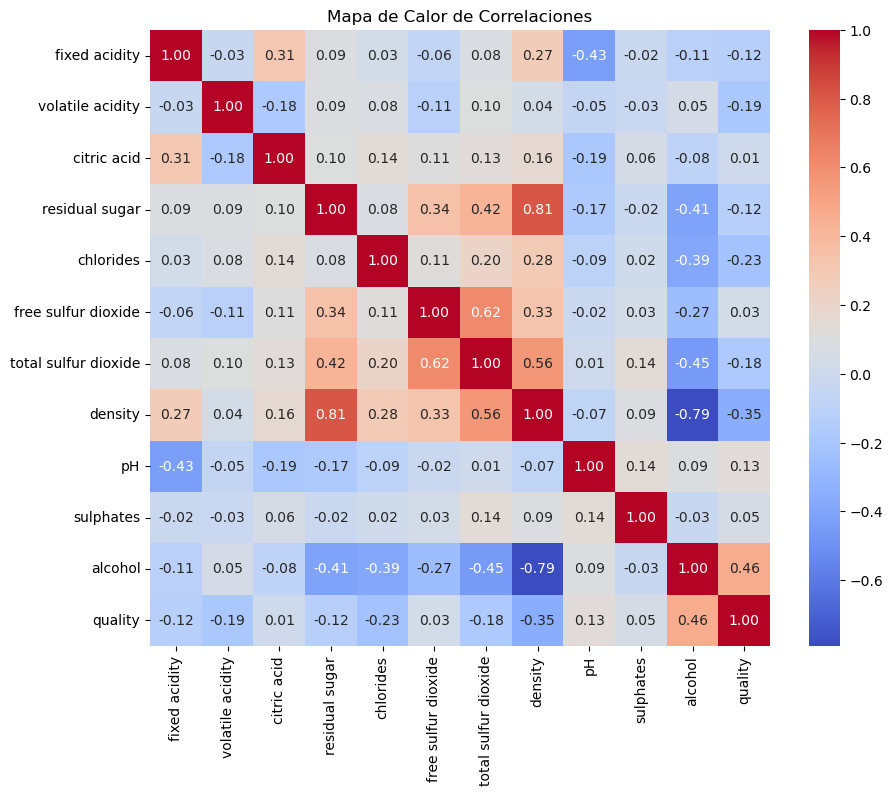

In [17]:
# b. Correlaciones
plt.figure(figsize=(10, 8))
sns.heatmap(white_wine.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Mapa de Calor de Correlaciones')
plt.show()

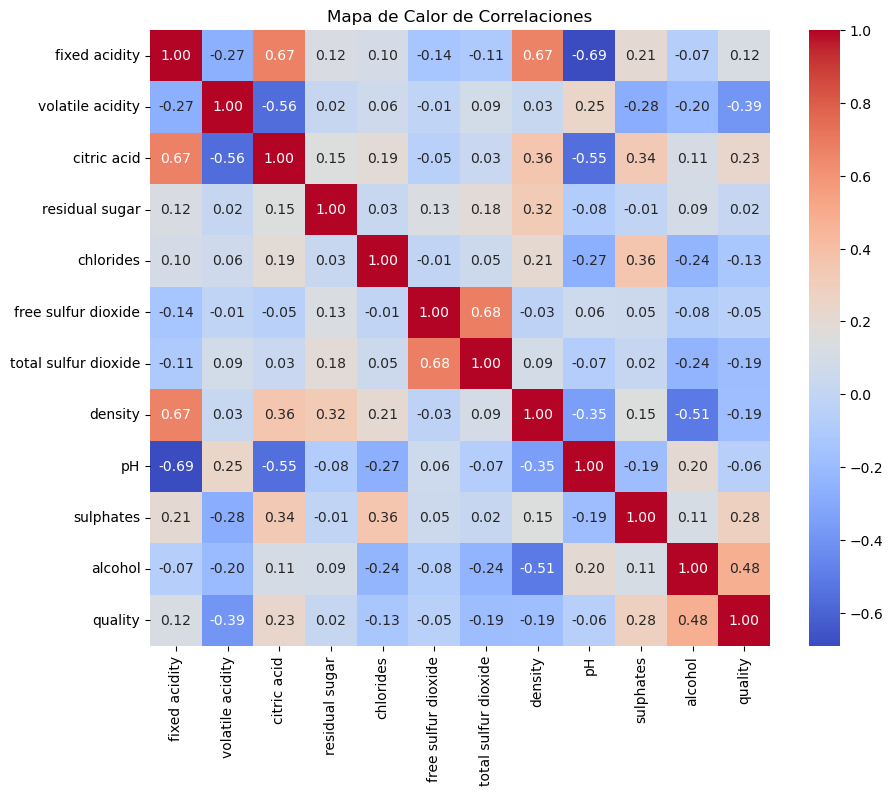

In [18]:
plt.figure(figsize=(10, 8))
sns.heatmap(red_wine.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Mapa de Calor de Correlaciones')
plt.show()

# 3. Implementación de Modelos

In [ ]:
# 4. Preparación de datos y normalización
def prepare_and_normalize_data(df):
    X = df.drop(columns=["quality"])
    y = np.where(df["quality"] >= 6, 1, 0)  
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    return X_scaled, y

# Preparar datasets
X_red, y_red = prepare_and_normalize_data(red_wine)
X_white, y_white = prepare_and_normalize_data(white_wine)

In [20]:
# 5. Entrenamiento y evaluación de modelos
def train_and_evaluate(X, y, model, model_name):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    metrics = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1-Score": f1_score(y_test, y_pred),
    }
    print(f"\n{model_name} Classification Report:\n")
    print(classification_report(y_test, y_pred))
    return metrics

In [21]:
# Definir modelos
log_reg = LogisticRegression(max_iter=1000, random_state=42)
knn = KNeighborsClassifier(n_neighbors=5)


In [22]:
# Evaluar modelos para vino tinto
print("\nEvaluación de modelos en Vino Tinto")
metrics_red_log = train_and_evaluate(X_red, y_red, log_reg, "Logistic Regression (Red Wine)")
metrics_red_knn = train_and_evaluate(X_red, y_red, knn, "KNN (Red Wine)")


Evaluación de modelos en Vino Tinto

Logistic Regression (Red Wine) Classification Report:

              precision    recall  f1-score   support

           0       0.69      0.76      0.72       192
           1       0.77      0.70      0.73       216

    accuracy                           0.73       408
   macro avg       0.73      0.73      0.73       408
weighted avg       0.73      0.73      0.73       408


KNN (Red Wine) Classification Report:

              precision    recall  f1-score   support

           0       0.66      0.61      0.64       192
           1       0.68      0.72      0.70       216

    accuracy                           0.67       408
   macro avg       0.67      0.67      0.67       408
weighted avg       0.67      0.67      0.67       408



In [23]:
# Evaluar modelos para vino blanco
print("\nEvaluación de modelos en Vino Blanco")
metrics_white_log = train_and_evaluate(X_white, y_white, log_reg, "Logistic Regression (White Wine)")
metrics_white_knn = train_and_evaluate(X_white, y_white, knn, "KNN (White Wine)")


Evaluación de modelos en Vino Blanco

Logistic Regression (White Wine) Classification Report:

              precision    recall  f1-score   support

           0       0.65      0.51      0.57       405
           1       0.77      0.86      0.81       784

    accuracy                           0.74      1189
   macro avg       0.71      0.68      0.69      1189
weighted avg       0.73      0.74      0.73      1189


KNN (White Wine) Classification Report:

              precision    recall  f1-score   support

           0       0.63      0.51      0.56       405
           1       0.77      0.84      0.80       784

    accuracy                           0.73      1189
   macro avg       0.70      0.68      0.68      1189
weighted avg       0.72      0.73      0.72      1189



In [24]:
# 6. Comparación de métricas
summary_metrics = pd.DataFrame({
    "Metric": ["Accuracy", "Precision", "Recall", "F1-Score"],
    "Logistic Regression (Red Wine)": list(metrics_red_log.values()),
    "KNN (Red Wine)": list(metrics_red_knn.values()),
    "Logistic Regression (White Wine)": list(metrics_white_log.values()),
    "KNN (White Wine)": list(metrics_white_knn.values()),
})
print("\nResumen de métricas:")
print(summary_metrics)


Resumen de métricas:
      Metric  Logistic Regression (Red Wine)  KNN (Red Wine)  \
0   Accuracy                        0.727941        0.671569   
1  Precision                        0.766497        0.678261   
2     Recall                        0.699074        0.722222   
3   F1-Score                        0.731235        0.699552   

   Logistic Regression (White Wine)  KNN (White Wine)  
0                          0.739277          0.729184  
1                          0.771789          0.769231  
2                          0.858418          0.841837  
3                          0.812802          0.803898  


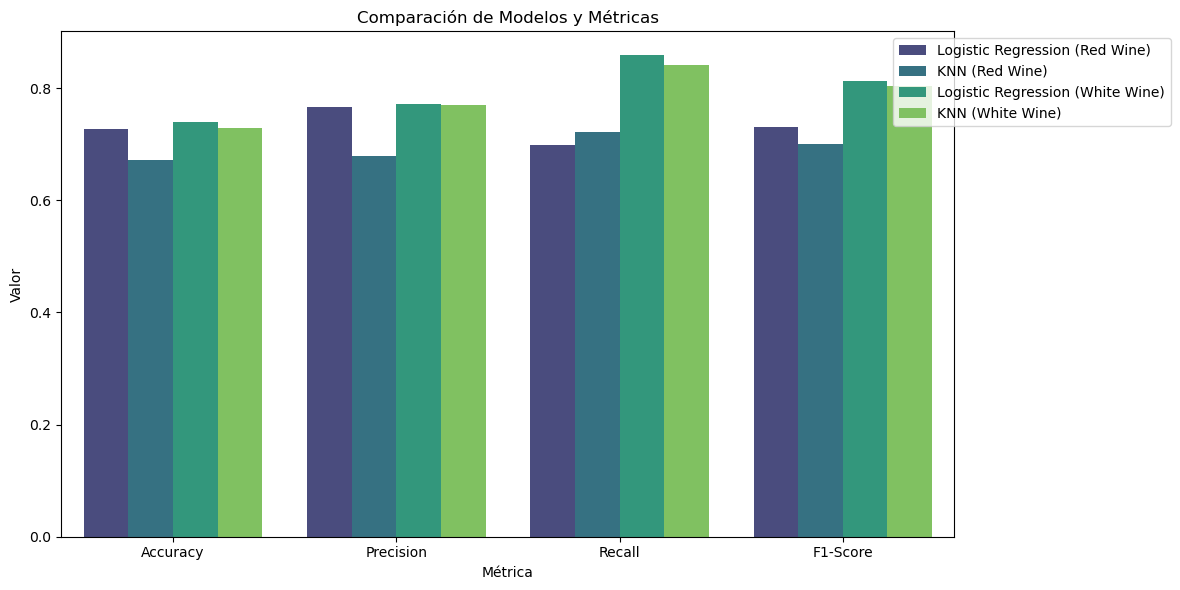

In [25]:
# Visualización de comparación
summary_metrics_melted = summary_metrics.melt(id_vars="Metric", var_name="Model", value_name="Score")
plt.figure(figsize=(12, 6))
sns.barplot(data=summary_metrics_melted, x="Metric", y="Score", hue="Model", palette="viridis")
plt.title("Comparación de Modelos y Métricas")
plt.xlabel("Métrica")
plt.ylabel("Valor")
plt.legend(loc="upper right", bbox_to_anchor=(1.25, 1))
plt.tight_layout()
plt.show()

# implementación de validacion cruzada (opcional)


Validación cruzada - Vino Tinto

Validación cruzada - Vino Blanco

Resumen de métricas de validación cruzada:
      Metric  Logistic Regression (Red Wine)  KNN (Red Wine)  \
0   Accuracy                        0.724807        0.686521   
1  Precision                        0.752501        0.698328   
2     Recall                        0.731663        0.738520   
3   F1-Score                        0.733838        0.712792   

   Logistic Regression (White Wine)  KNN (White Wine)  
0                          0.739722          0.722549  
1                          0.781493          0.770261  
2                          0.848509          0.827076  
3                          0.810374          0.796109  


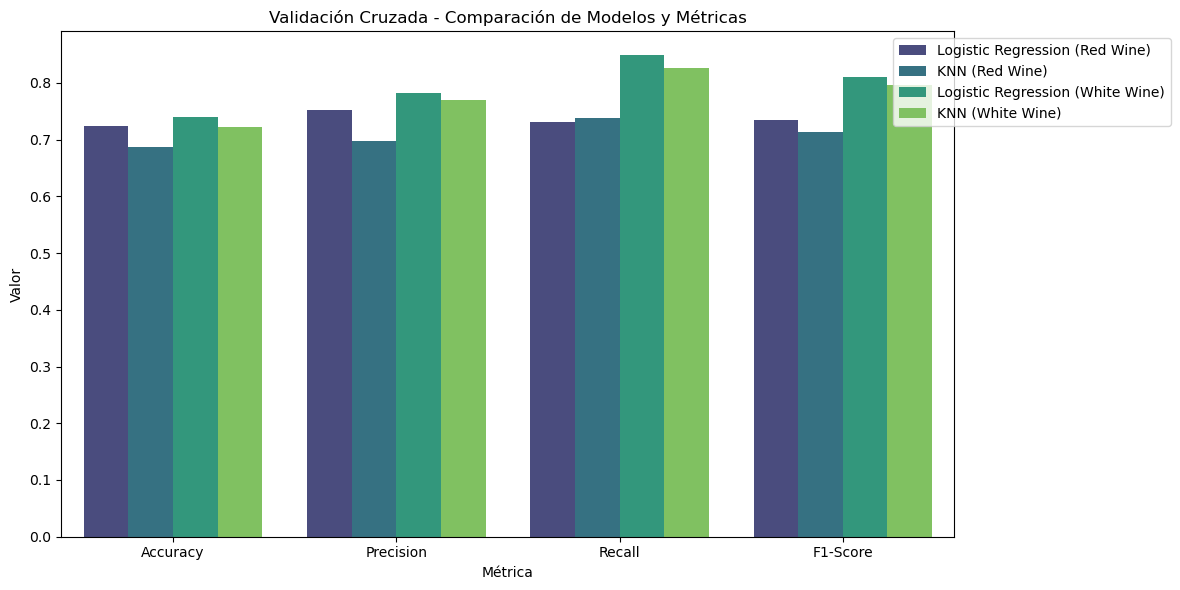

In [26]:
# Función para realizar validación cruzada
def cross_validation_metrics(X, y, model, cv=5):
    metrics = {}
    metrics["Accuracy"] = cross_val_score(model, X, y, cv=cv, scoring="accuracy").mean()
    metrics["Precision"] = cross_val_score(model, X, y, cv=cv, scoring="precision").mean()
    metrics["Recall"] = cross_val_score(model, X, y, cv=cv, scoring="recall").mean()
    metrics["F1-Score"] = cross_val_score(model, X, y, cv=cv, scoring="f1").mean()
    return metrics

# Validación cruzada para vinos tintos
print("\nValidación cruzada - Vino Tinto")
red_log_cv = cross_validation_metrics(X_red, y_red, log_reg)
red_knn_cv = cross_validation_metrics(X_red, y_red, knn)

# Validación cruzada para vinos blancos
print("\nValidación cruzada - Vino Blanco")
white_log_cv = cross_validation_metrics(X_white, y_white, log_reg)
white_knn_cv = cross_validation_metrics(X_white, y_white, knn)

# Resumen de métricas de validación cruzada
cv_metrics_summary = pd.DataFrame({
    "Metric": ["Accuracy", "Precision", "Recall", "F1-Score"],
    "Logistic Regression (Red Wine)": list(red_log_cv.values()),
    "KNN (Red Wine)": list(red_knn_cv.values()),
    "Logistic Regression (White Wine)": list(white_log_cv.values()),
    "KNN (White Wine)": list(white_knn_cv.values()),
})
print("\nResumen de métricas de validación cruzada:")
print(cv_metrics_summary)

# Visualización de métricas
cv_metrics_melted = cv_metrics_summary.melt(id_vars="Metric", var_name="Model", value_name="Score")
plt.figure(figsize=(12, 6))
sns.barplot(data=cv_metrics_melted, x="Metric", y="Score", hue="Model", palette="viridis")
plt.title("Validación Cruzada - Comparación de Modelos y Métricas")
plt.xlabel("Métrica")
plt.ylabel("Valor")
plt.legend(loc="upper right", bbox_to_anchor=(1.25, 1))
plt.tight_layout()
plt.show()


Observaciones:

Vino Tinto:
Regresión logística sigue siendo el mejor modelo, con mejor Accuracy(72,48%) y F1-Score(73,38%) que KNN.
KNN muestra un Recallpoco más alto (73,85%) pero sacrifica Precision.

Vino Blanco:
Regresión Logística tiene un mejor desempeño general, con mayor Accuracy(73,97%) y F1-Score(81,04%).
KNN es competitivo, pero tiene métricas ligeramente más bajas en comparación con Regresión Logística.

Conclusión:
Para vinos tintos: Logistic Regression es el modelo más robusto y consistente.
Para vinos blancos: Logistic Regression también es preferible, aunque KNN se desempeña razonablemente bien.